# Model project: *Over Lapping Generational Model*

Imports and set magics:

In [340]:
# (a) Import python modules
import numpy as np
from scipy import optimize
import sympy as sm
from types import SimpleNamespace
import matplotlib.pyplot as plt
import ipywidgets as widgets

# (b) autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# (c) import models
import analytical as ana
import nummerical as num

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## **Introduction to the model**

In my model project, I have chosen to examine an *Over Lapping Generational* model (OLG model), which is a long run growth model that accounts for consumer preferences. 

In the model, the agents live for two periods: *t* and *t+1*, while the government has infitnite horizons. The agents are divided into the young generation and and the old generation, and their consumption is given by $C_{1t}$ and $C_{2t+1}$, respectively.

Time is discrete and indexed by $t\epsilon (0, 1, 2, ...)$

The OLG model presents two frameworks:

* The first framework is based on private savings, so all generations save for their own retirement. This framework is called *fully funded*.

* The second framework is a *pay-as-you-go system* (payg), where the young generation pays for the old generation's retirement. The major challenge with this system occurs, when the young generation is smaller than the old generation, which is the current case in Denmark.

Since Denmark is based on a PAYG-system, I will examine this system in the following analysis:

## **Model description**

### *Population*


Population is given by: 

$$
\begin{aligned}
L_t=L_{t-1}(1+n)
\end{aligned}
$$

$L_t$ denotes the current young generation

$L_{t-1}$ is the old generation who are still alive in the current period

$n$ = growth rate

#### *Consumer's utility function*

The consumers maximize their utility from their income. Notice that the consumers face a trade-off when decide whether to consume now and save later or vice versa.


$$
\begin{aligned} 
U_t = log(c_{1t}) + \beta log(c_{2t+1})\\
\beta =\frac{1}{1+{\rho}}
\end{aligned}
$$

### *Budget contraints (BC)*

As described in the introduction, only the young generation works, while the old generation is retired. Do to the PAYG-structure, the young generation is subject to income taxation ($\tau$). Furthermore, the young generation saves some of their income for their retirement ($s_t$).

The old generation consumes their savings (plus the interest income from their savings) and the public retirement ($d_{t+1}$)

$$
\begin{aligned}
&c_{1t} = w_t(1-\tau) - s_t\\
&c_{2t+1} = (1+r_{t+1})s_t + (1+n)d_{t+1}
\end{aligned} 
$$





### *Consumer's maximization problem*

The young generation's maximization problem is as follows:

$$
\begin{aligned} 
U_t = log(c_{1t}) + \beta log(c_{2t+1})\\
st.\\
c_{1t} = w_t(1-\tau) - s_t\\
c_{2t+1} = (1+r_{t+1})s_t + (1+n)d_{t+1}
\end{aligned}
$$

### *Firms*

In the model, firms operate according to a Cobb Douglas productin function. This implies that only capital $(K_t)$, technology $(A)$, and labour $(L_t)$ are input factors in the production function. $\alpha$ is the share of output that goes to capital and so $(1-\alpha)$ goes to labour
$$\begin{aligned}
 Y_t = AK_t^{\alpha}L_t^{1-\alpha}
\end{aligned} 
$$ 


Based on the assumption that capital decressiated completely each period $(\delta=1)$, firm's maximization problems is as follows:


$$
\begin{aligned}
 max \Pi  = AK_t^{\alpha}L_t^{1-\alpha} - r_tK_t - w_tL_t
\end{aligned} 
$$ 

## **Analytical solution**

First of all, I import my OLG model from my py-file:

In [341]:
# (a) Importing the modl
model_a = ana.OLGmodelanalytical()
par = model_a.par

Secondly, I print the **Euler Equation**:

In [342]:
# (a) Consumer's utility function
print('Consumers utility function:')
display(sm.Eq(par.U_t, model_a.utility()))


# (b) IBC
print('Intertemporal budget constraint:')
display(sm.Eq(0, model_a.consumerBC()))


# (c) Euler equation
print('The Euler Equation:')
model_a.eulerequation()

Consumers utility function:


Eq(U_t, log(c_{1t}) + log(c_{2t+1})/(rho + 1))

Intertemporal budget constraint:


Eq(0, -w_t*(1 - tau) + (c_{1t}*r_{t+1} + c_{1t} + c_{2t+1} - n*tau - n*w_{t+1} - tau - w_{t+1})/(r_{t+1} + 1))

The Euler Equation:


Eq(c_{2t+1}*(rho + 1)/(r_{t+1} + 1), c_{1t})

Thirdly, I find the **optimal saving rate** by substituting the Euler Equation into the BC. The optimal saving rate, $(s_t)$ is determined by the consumer's preferences.

In [343]:
# (a) Optimal savings
print('Optimal saving:')
display(sm.Eq(par.s_t, model_a.Optimalsaving()))

Optimal saving:


Eq(s_t, (w_t*(-r_{t+1}*tau + r_{t+1} - tau + 1) + w_{t+1}*(-n*rho*tau - n*tau - rho*tau - tau))/(r_{t+1}*rho + 2*r_{t+1} + rho + 2))

Then, I find the equation for **capital accumulation**:

In [344]:
# (a) Print capital accumulation
print('Capital accumulation:')
model_a.capitalacc()

Capital accumulation:


Eq(k_{t+1}, A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

Since capital in **steady state** is given by: $k_t=k_{t+1}=k^*$, I find ss by isolating *k*

In [345]:
# (a) Print steady state for capital
print('Steady state:')
display(sm.Eq(par.k_ss, model_a.steadystate()))

Steady state:


Eq(k^*, ((1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))**2*(n + 1)*(rho + 2)))**(1/(1 - alpha)))

Finally, I want to calculate steady state, if I plug in some parameter estimates:

In [372]:
# (a) Defining parameters
alpha_ = 0.33
rho_ = 0.2
n_ = 0.01
tau_ = 0.2
A_ = 20


# (b) Defining the equation for steady state for capital
k_ss_func = sm.lambdify(args = (par.alpha, par.rho, par.n, par.tau, par.a), expr = model_a.steadystate())


# (c) Print steady state for capital
print('Based on the given parameters, steady state is given by:')
k_ss_func(alpha_, rho_, n_, tau_, A_)

Based on the given parameters, steady state is given by:


0.06589759480640185

The result shows steady state of capital per worker is 0.066 when consumers optimize their utility. This seems too low. Something must have gone wrong with the analytical coding, however, I am not able to solve it.

## **Nummerical solution**

As an alternative to my analytical solution, I will find the nummerical solution. I use the findings from the analytical solution to find the steady state level of capital in the nummerical solution. I use a numerical optimization to find the steady state.

First of all, I import the model:

In [347]:
# (a) Importing the nummerical model
model_n = num.OLGmodelnummerical()

Then, I plot the optimal level of capital in the transition curve:

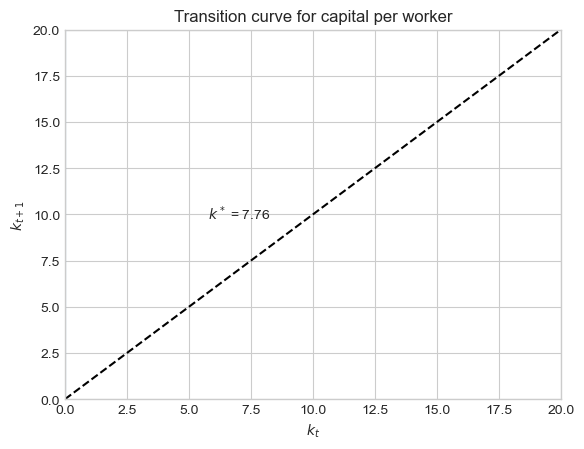

In [353]:
# (a) Using the transition curve
model_n.transitioncurve()


# (b) Creating the figure
figure1 = plt.figure()
ax = figure1.add_subplot(1,1,1)
model_n.plot_transition_curve(ax)
model_n.fourtyfive_curve(ax)


# (c) Defining steady state of capital
plt.annotate(f'$k^*$ = {model_n.ss:.2f}', (model_n.ss-2, model_n.ss+2))
plt.title('Transition curve for capital per worker')
plt.show()



Based on the findings from the transition curve in **Figure 1**, capital per worker in steady state is 7.76, which seems more realistic than the estimate in the analyical solution.


## **The effect of population growth**

So far, the parmater estimates have been fixed, and so it could be interesting to vary these estimates and thereby examine how the variations affect steady state.

The lack of labor at the danish labor market has been a major public debate since 2020. Therefore, it is interesting to examine how steady steade change, when changing the population rate. According to *The World Bank*, Denmark has an annual population growth of 0.04 pct, cf. (https://data.worldbank.org/indicator/SP.POP.GROW?locations=DK=). This is 0.6 percentage points lower than my fixed initial parameter estimate of population growth. 

In the following, I estimate ss with different population growth rates. First of all, I define the capital accumulation as I showed in the analytical solution:

In [354]:
# (a) Print capital accumulation
print('Capital accumulation:')
model_a.capitalacc()

Capital accumulation:


Eq(k_{t+1}, A*k_t**alpha*(1 - alpha)*(1 - tau)/((1 + tau*(1 - alpha)*(rho + 1)/(alpha*(rho + 2)))*(n + 1)*(rho + 2)))

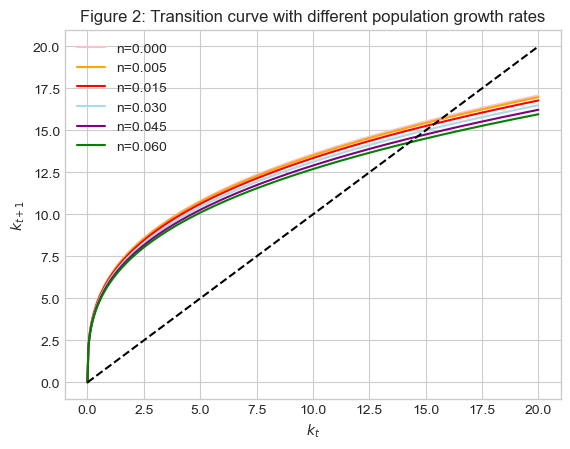

In [369]:
# (a) Defining the transition equation
def transition(k_t, alpha, rho, n, A, tau):
    return ((alpha * (1 / (1 + rho))) * A * k_t ** alpha * (alpha *  tau - alpha - tau + 1)) / (alpha * (1 / (1 + rho)) * n * alpha * (1 / (1 + rho)) - alpha * tau * n + alpha * n - alpha * tau + alpha + n * tau + tau)


# (b) Defining parameters
alpha_ = 0.33
rho_ = 0.2
tau_ = 0.2
A_ = 20
k_t = np.linspace(0,20,500)


# (c) Defining different values of population growth
n1 = 0.0
n2 = 0.005
n3 = 0.015
n4 = 0.030
n5 = 0.045
n6 = 0.060


# (c) Creating the figure
figure2 = plt.figure()
ax = figure2.add_subplot(1,1,1)
plt.plot(k_t, transition(k_t, alpha_, rho_, n1, A_, tau_), color='pink', label='n=0.000') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n2, A_, tau_), color='orange', label='n=0.005') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n3, A_, tau_), color='red', label='n=0.015') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n4, A_, tau_), color='lightblue', label='n=0.030') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n5, A_, tau_), color='purple', label='n=0.045') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n6, A_, tau_), color='green', label='n=0.060') 
plt.plot(k_t,k_t, color = 'black', linestyle = '--')


# (d) adjusting the figure
plt.title('Figure 2: Transition curve with different population growth rates')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t + 1}$')
plt.legend()
plt.show()

Even though the differences are rather small, **Figure 2** illustrates that when the population growth increases, the capital per worker in steady state decreases.

## **The effect of tax rate**

Denmark has one of the highest tax rates in the World. Therefore, it is interesting to examine how different tax rates affect steady state of capital per worker. 

My initial fixed tax rate is 20 pct., which is much lower than the actual tax rate in Denmark (average 50 pct.). In the following, I run different senarios from the most extreme tax rate of 100 pct to zero tax rate

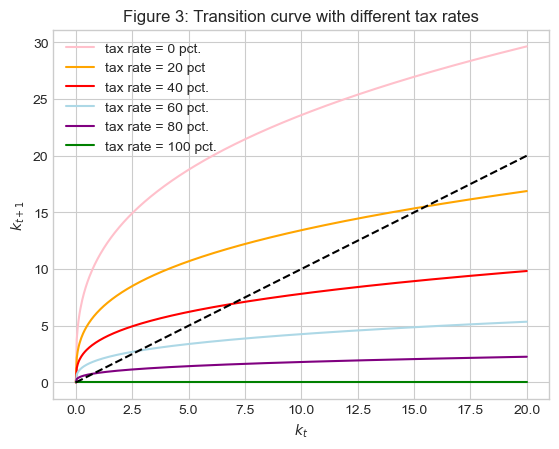

In [371]:
# (a) Defining the transition equation
def transition(k_t, alpha, rho, n, A, tau):
    return ((alpha * (1 / (1 + rho))) * A * k_t ** alpha * (alpha *  tau - alpha - tau + 1)) / (alpha * (1 / (1 + rho)) * n * alpha * (1 / (1 + rho)) - alpha * tau * n + alpha * n - alpha * tau + alpha + n * tau + tau)


# (b) Defining parameters
alpha_ = 0.33
rho_ = 0.2
n_ = 0.01
A_ = 20
k_t = np.linspace(0,20,500)


# (c) Defining different tax rates
tau1 = 0.0
tau2 = 0.2
tau3 = 0.4
tau4 = 0.6
tau5 = 0.8
tau6 = 1


# (c) Creating the figure
figure3 = plt.figure()
ax = figure3.add_subplot(1,1,1)
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau1), color='pink', label='tax rate = 0 pct.') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau2), color='orange', label='tax rate = 20 pct') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau3), color='red', label='tax rate = 40 pct.') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau4), color='lightblue', label='tax rate = 60 pct.') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau5), color='purple', label='tax rate = 80 pct.') 
plt.plot(k_t, transition(k_t, alpha_, rho_, n_, A_, tau6), color='green', label='tax rate = 100 pct.') 
plt.plot(k_t,k_t, color = 'black', linestyle = '--')


# (d) Adjusting the figure
plt.title('Figure 3: Transition curve with different tax rates')
plt.xlabel('$k_t$')
plt.ylabel('$k_{t + 1}$')
plt.legend()
plt.show()

Based on **Figure 3**, I find that an increase in the tax rate decreases the steady state of capital per worker. Explained intuitively, when taxes increases, the disposal income for the young generation decreases, and so their savings decreases. Notice, that the public retirement to the old generaiton increases, when the tax rate increases.

## **Conclusion**

In my model project, I have analyzed the OLG model analytically and nummerically. The results differ heavily, which is presumblary caused by a mistake in the analytical py-file.

When examine the effect of *population growth*, I find that increase in the population growth decreases steady state for capital per worker because the aggregated capital is unchanged.

When examine the effet of *tax rate*, I find that an increase in the tax rate decreases the steady state for capital. This is caused by a lower disposal income, which lowers the savings when the saving rate is unchanged.